# Tutorial 2: Increasing the radius ratio knot resolution

**Author:** Hannu Parviainen <br>
**Edited:** 14 August 2024

In [1]:
%matplotlib inline

In [2]:
from matplotlib.pyplot import subplots, setp, GridSpec, Figure
from matplotlib.patches import FancyBboxPatch, Rectangle
from numpy import linspace
from exoiris import load_model, clean_knots

In [133]:
ts1 = load_model("01a.fits")

In [146]:
ts2 = load_model("A2.fits")

In [147]:
mflux = ts2._tsa.transit_model(ts.optimizer_population[ts._tsa._de_imin])

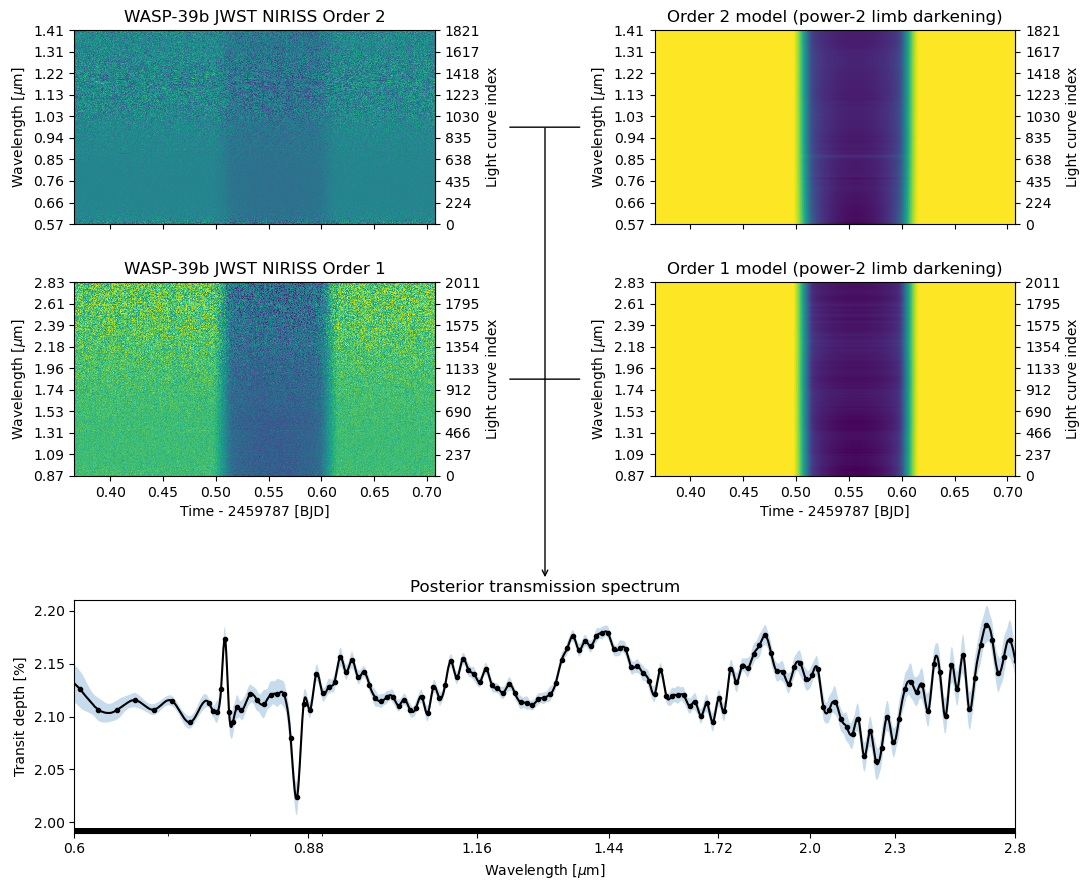

In [148]:
fig = Figure(figsize=(11, 9))

gs = GridSpec(4, 3, width_ratios=(0.6, 0.1, 0.6), height_ratios=(0.25, 0.25, 0.01, 0.3))

axs1 = fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0])
axs2 = fig.add_subplot(gs[0,2]), fig.add_subplot(gs[1,2])
ax3 = fig.add_subplot(gs[-1, :])

ts2.data.plot(ax=axs1)
ts2.data.plot(ax=axs2, data=mflux)
ts2.plot_transmission_spectrum(result='mcmc', ax=ax3, xscale='log', ylim=(1.99, 2.21), xticks=[0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8])

setp(ax3, xlim=(0.6, 2.8))
setp(axs1[0].get_xticklabels() + axs2[0].get_xticklabels(), visible=False)

[ax.set_title(f'WASP-39b JWST NIRISS Order {2-i}') for i, ax in enumerate(axs1)]
[ax.set_title(f'Order {2-i} model (power-2 limb darkening)') for i, ax in enumerate(axs2)]
ax3.set_title('Posterior transmission spectrum')
#fig.suptitle('WASP-39b JWST NIRISS Low-Resolution Transmission Spectroscopy', y=0.99, fontsize='x-large')
fig.tight_layout()

axs2[0].annotate("", 
                 xy=(1.2, 0.5), xycoords = axs1[0].transAxes,
                 xytext=(-0.2, 0.5), textcoords= axs2[0].transAxes,
                 arrowprops=dict(arrowstyle="-"))

axs2[1].annotate("", 
                 xy=(1.2, 0.5), xycoords = axs1[1].transAxes,
                 xytext=(-0.2, 0.5), textcoords= axs2[1].transAxes,
                 arrowprops=dict(arrowstyle="-"))

axs2[0].annotate("", 
                 xy=(0.50, 0.35), xycoords = fig.transFigure,
                 xytext=(0.5, 0.855), textcoords=fig.transFigure,
                 arrowprops=dict(arrowstyle="->"))

fig.savefig('example1.png', dpi=100)
fig

In [152]:
t1 = ts1.get_transmission_spectrum()
t2 = ts2.get_transmission_spectrum()

In [164]:
sids1 = argsort(t1.index.values)
sids2 = argsort(t2.index.values)

In [161]:
t2

,depth,depth_e,depth_eneg,depth_epos
wavelength,,,,
0.569910,0.019153,0.000720,-0.000696,0.000744
0.570315,0.019228,0.000685,-0.000662,0.000709
0.570719,0.019304,0.000664,-0.000644,0.000683
0.571124,0.019377,0.000634,-0.000616,0.000652
0.571529,0.019456,0.000602,-0.000591,0.000613
...,...,...,...,...
2.824131,0.021435,0.000290,-0.000294,0.000286
2.825141,0.021438,0.000316,-0.000316,0.000316
2.826151,0.021444,0.000347,-0.000342,0.000351


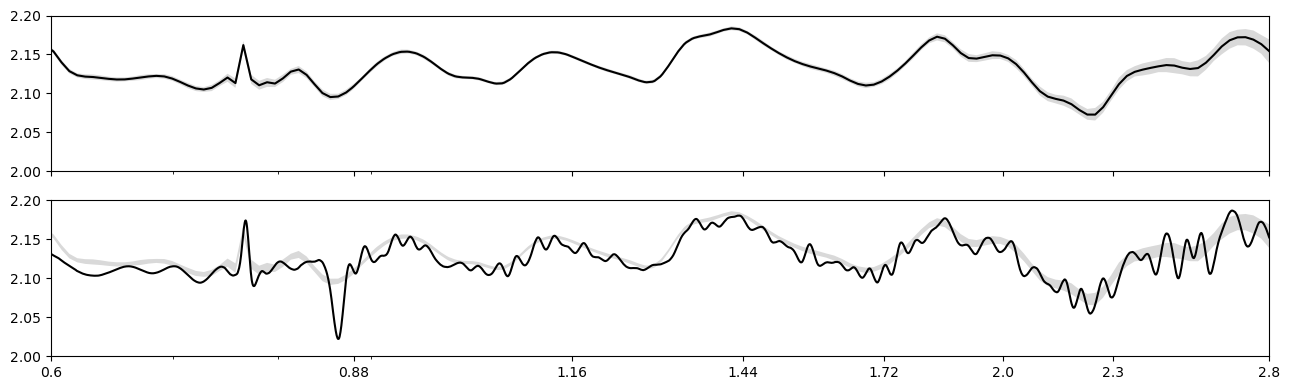

In [192]:
fig, (ax1, ax2) = subplots(2, 1, figsize=(13,4), sharex='all', sharey='all')
ax1.plot(t1.index.values[sids1], 1e2*t1.depth.values[sids1], 'k')
ax1.fill_between(t1.index.values[sids1], 
                 1e2*(t1.depth.values[sids1] + t1.depth_eneg.values[sids1]),
                 1e2*(t1.depth.values[sids1] + t1.depth_epos.values[sids1]), 
                 fc='0.85')
ax2.fill_between(t1.index.values[sids1], 
                 1e2*(t1.depth.values[sids1] + t1.depth_eneg.values[sids1]),
                 1e2*(t1.depth.values[sids1] + t1.depth_epos.values[sids1]), 
                 fc='0.85')
ax2.plot(t2.index.values[sids2], 1e2*t2.depth.values[sids2], 'k')
ax2.set_xscale('log')
ax2.set_xticks([0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8], [0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8])
setp(ax2, xlim=(0.6, 2.8), ylim=(2.0, 2.2))
fig.tight_layout()

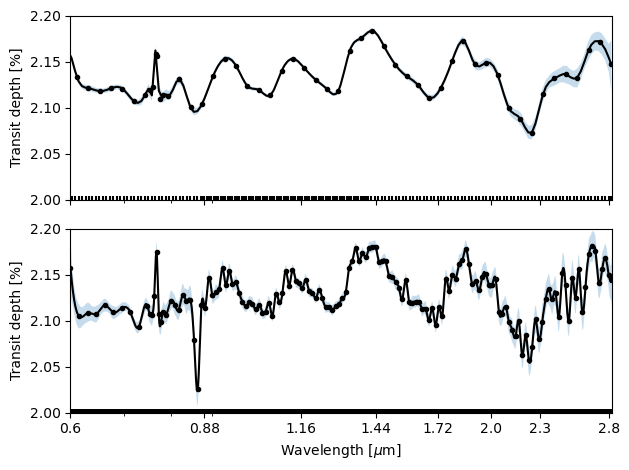

In [145]:
fig, axs = subplots(2, 1, sharex='all', sharey='all')
ts1.plot_transmission_spectrum('mcmc', ax=axs[0], xscale='log', ylim=(2, 2.2), xticks=[0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8]);
ts2.plot_transmission_spectrum('mcmc', ax=axs[1], xscale='log', ylim=(2, 2.2), xticks=[0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8]);
setp(axs[0], xlabel='')
fig.tight_layout()

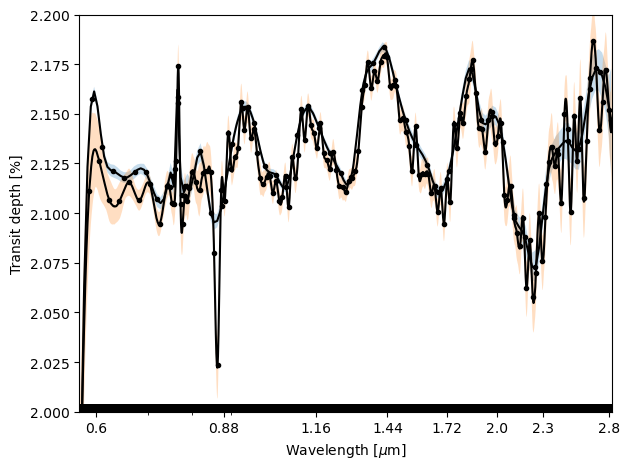

In [150]:
fig, axs = subplots(sharex='all', sharey='all')
ts1.plot_transmission_spectrum('mcmc', ax=axs, xscale='log', ylim=(2, 2.2), xticks=[0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8]);
ts2.plot_transmission_spectrum('mcmc', ax=axs, xscale='log', ylim=(2, 2.2), xticks=[0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8]);
fig.tight_layout()

---

<center>&copy;2024 Hannu Parviainen</center>